In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def plot_dim_reduction(data_label_pairs, method='pca', merge=False,labels = ['valid_0', 'valid_1', 'zh_0', 'zh_1']):
    if method == 'pca':
        dim_reduction = PCA(n_components=2)
    elif method == 'tsne':
        dim_reduction = TSNE(n_components=2)
    else:
        raise ValueError("Invalid method. Expected 'pca' or 'tsne'")

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title('2 component ' + method.upper(), fontsize = 20)
    colors = ['r', 'g', 'b', 'y']
    

    all_data = np.concatenate([data for data, _ in data_label_pairs])
    all_data_2d = dim_reduction.fit_transform(all_data)

    start = 0
    for i, (data, label) in enumerate(data_label_pairs):
        end = start + len(data)
        data_2d = all_data_2d[start:end]
        start = end

        df = pd.DataFrame(data = data_2d, columns = ['component 1', 'component 2'])
        df['label'] = label

        for target in [0, 1]:
            indicesToKeep = df['label'] == target
            ax.scatter(df.loc[indicesToKeep, 'component 1']
                       , df.loc[indicesToKeep, 'component 2']
                       , c = colors[i*2 + target]
                       , s = 10, label=labels[i*2 + target])
        if not merge:
            ax.legend()
            ax.grid()
            plt.show()
            fig = plt.figure(figsize = (8,8))
            ax = fig.add_subplot(1,1,1) 
            ax.set_xlabel('Component 1', fontsize = 15)
            ax.set_ylabel('Component 2', fontsize = 15)
            ax.set_title('2 component ' + method.upper(), fontsize = 20)

    if merge:
        ax.legend()
        ax.grid()
        plt.show()

In [8]:

data = pd.read_csv("/home/Q/Diploma_thesis/transferlearning-master-CAE/code/DeepDA/train_log/features/src/38.csv")
features_src = data.iloc[:, :-1]
labels_src = data.iloc[:, -1]

data = pd.read_csv("/home/Q/Diploma_thesis/transferlearning-master-CAE/code/DeepDA/train_log/features/tgt/38.csv")
features_tgt = data.iloc[:, :-1]
labels_tgt = data.iloc[:, -1]

/home/Q/anaconda3/envs/CAE_ADD/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/Q/anaconda3/envs/CAE_ADD/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


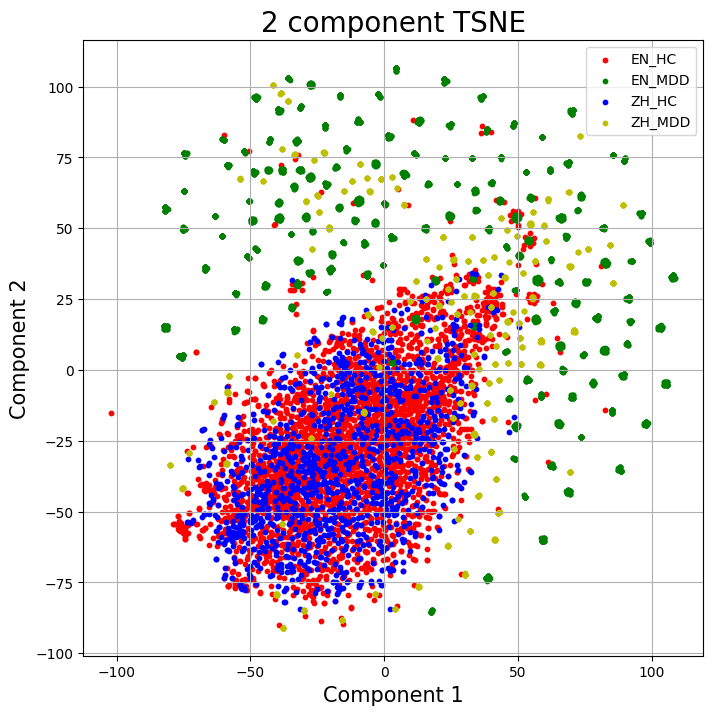

In [10]:
plot_dim_reduction([(features_src, labels_src), (features_tgt, labels_tgt)], method='tsne',merge=True,labels = ['EN_HC', 'EN_MDD', 'ZH_HC', 'ZH_MDD'])